In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
prices = pd.read_csv("C:/Users/Li-Ji/Desktop/sap100.csv") #2016.06.06-2023.07.13
prices['Date'] = pd.to_datetime(prices['Date']) # for resample in month, year  
prices.set_index('Date', inplace=True) # move to the left and no need to reassignment  
prices.head() #.head(): first five rows of the data

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,160.190002,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,158.889999,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,158.000000,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,156.779999,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,154.779999,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


Exercise 1

Choose a single stock from the index, and compute the corresponding daily, monthly and annual log-returns. For each sampling frequency, test whether the returns are normally distributed. Include appropriate graphs in your final report and ensure that you clearly explain your analysis in your own words.

Daily JB Statistic: 1412.2957212184083
Daily P-Value: 2.108049136553411e-307
Result: reject H0, in favour of H1


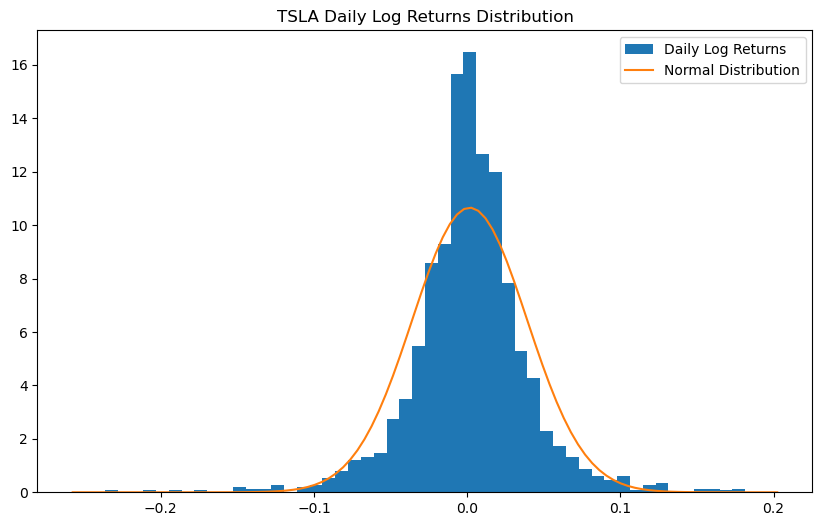

In [6]:
# TSLA
tsla = prices['TSLA']

#daily log return
log_return_d = np.log(tsla/tsla.shift(1)).dropna() 
log_return_d
plt.figure(figsize=(10, 6))
plt.hist(log_return_d,bins = 50, density=True, label='Daily Log Returns')

# Normality test
jb_d, p_value_d = stats.jarque_bera(log_return_d)
print("Daily JB Statistic:", jb_d)
print("Daily P-Value:", p_value_d)
if p_value_d <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_d, std_d = stats.norm.fit(log_return_d) # stats.norm.fit: return tuple(mean, standard deviation)  
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_d = stats.norm.pdf(x_axis, mean_d, std_d)
plt.plot(x_axis, p_d, label='Normal Distribution')
plt.title('TSLA Daily Log Returns Distribution')
plt.legend()
plt.show()

Monthly JB Statistic: 2.1648242703324634
Monthly P-Value: 0.33877736249199225
Result: reject H1


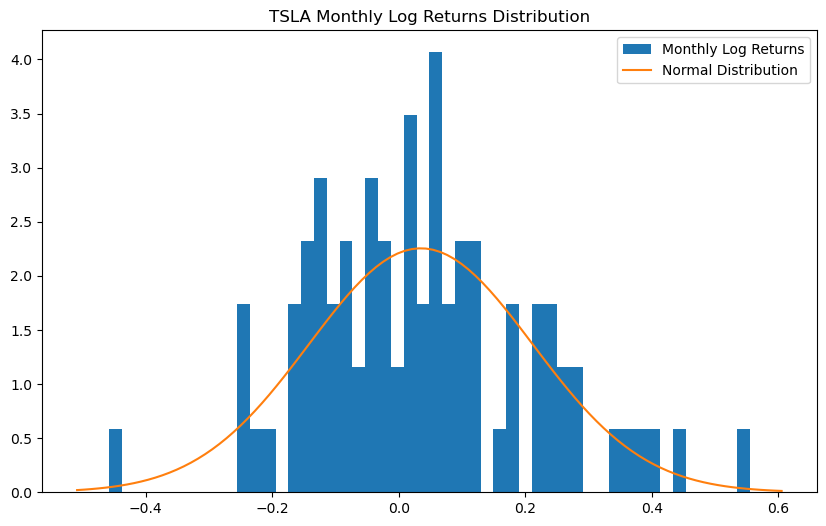

In [7]:
#monthly log return
tsla_m = tsla.resample('ME').last()
log_return_m = np.log(tsla_m/tsla_m.shift(1)).dropna()
log_return_m
plt.figure(figsize=(10, 6))
plt.hist(log_return_m,bins = 50, density=True, label='Monthly Log Returns')

# Normality test
jb_m, p_value_m = stats.jarque_bera(log_return_m)
print("Monthly JB Statistic:", jb_m)
print("Monthly P-Value:", p_value_m)
if p_value_m <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_m, std_m = stats.norm.fit(log_return_m) # stats.norm.fit: return tuple(mean, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_m = stats.norm.pdf(x_axis, mean_m, std_m)
plt.plot(x_axis, p_m, label='Normal Distribution')
plt.title('TSLA Monthly Log Returns Distribution')
plt.legend()
plt.show()

Yearly JB Statistic: 0.17571876011220083
Yearly P-Value: 0.9158896600209737
Result: reject H1


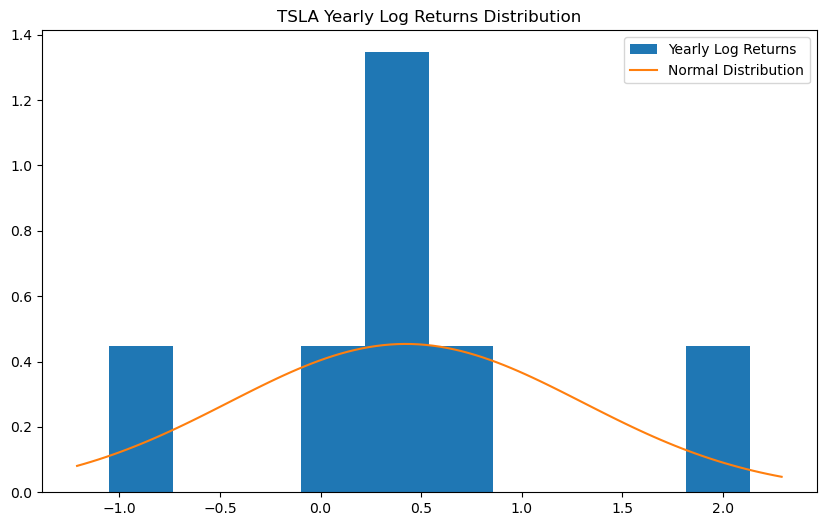

In [8]:
#yearly log return
tsla_y = tsla.resample('YE').last()
log_return_y = np.log(tsla_y/tsla_y.shift(1)).dropna()
log_return_y
plt.figure(figsize=(10, 6))
plt.hist(log_return_y, density=True, label='Yearly Log Returns')

# Normality test
jb_y, p_value_y = stats.jarque_bera(log_return_y)
print("Yearly JB Statistic:", jb_y)
print("Yearly P-Value:", p_value_y)
if p_value_y <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
YEan_y, std_y = stats.norm.fit(log_return_y) # stats.norm.fit: return tuple(YEan, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_y = stats.norm.pdf(x_axis, YEan_y, std_y)
plt.plot(x_axis, p_y, label='Normal Distribution')
plt.title('TSLA Yearly Log Returns Distribution')
plt.legend()
plt.show()

Final Report:

I selected TSLA as the target stock. Log-returns were computed using the formula $r_t = \ln(P_t / P_{t-1})$. To obtain monthly and yearly data, I set the 'Date' column as the time index and resampled the daily prices, using the last closing price to represent each period.To test for normality across different frequencies, I employed the Jarque-Bera (JB) test alongside visual inspection of the histograms.

For daily log returns: The JB-test yielded a p-value of approximately 2.11e-307, strongly indicating that the data does not follow a normal distribution. This is visually confirmed by the graph, which exhibits a slight left skew and leptokurtosis (fat tails).

For monthly log returns: The p-value was 0.339. Consequently, we fail to reject the null hypothesis of normality. Visually, the distribution appears closer to a normal curve compared to daily returns, though it deviates slightly from a standard normal distribution.

For yearly log returns: The high p-value of 0.916 suggests the data is consistent with a normal distribution. Visually, the distribution resembles a normal curve, although the shape is somewhat influenced by the limited sample size.

Exercise 2

Compute the Jarque-Bera test statistic and p-values for all stocks in the index over daily, monthly and annual frequencies. Summarise your results in a single graph which shows three side-by-side boxplots of the test statistic comparing: daily, monthly and annual return distributions. Comment on whether your results support the claim that stock returns exhibit aggregational Gaussianity (see, e.g., Cont 2001; reference below).

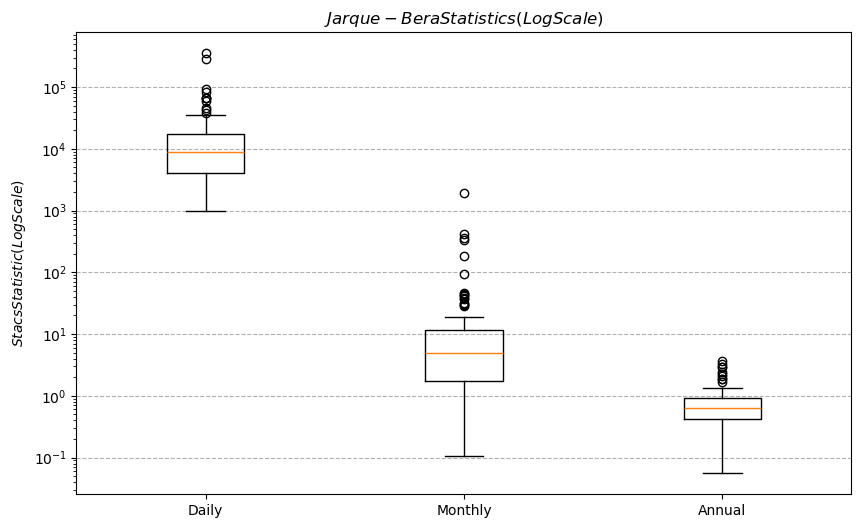

In [9]:
r_d = np.log(prices / prices.shift(1)).replace([np.inf, -np.inf], np.nan)
r_m = np.log(prices.resample('ME').last() / prices.resample('ME').last().shift(1)).replace([np.inf, -np.inf], np.nan)
r_y = np.log(prices.resample('YE').last() / prices.resample('YE').last().shift(1)).replace([np.inf, -np.inf], np.nan)

results_data = []
for stock in prices.columns:
    # Daily
    prices_d = r_d[stock].dropna()
    if len(prices_d) > 2:
        stacs_d, p_d = stats.jarque_bera(prices_d)
    else:
        stacs_d, p_d = np.nan, np.nan
    # Monthly
    prices_m = r_m[stock].dropna()
    if len(prices_m) > 2:
        stacs_m, p_m = stats.jarque_bera(prices_m)
    else:
        stacs_m, p_m = np.nan, np.nan
    # Yearly
    prices_y = r_y[stock].dropna()
    if len(prices_y) > 2: 
        stacs_a, p_a = stats.jarque_bera(prices_y)
    else:
        stacs_a, p_a = np.nan, np.nan
        
    results_data.append({
        'Stock': stock,
        'Stacs_Daily': stacs_d, 'P_Daily': p_d,
        'Stacs_Monthly': stacs_m, 'P_Monthly': p_m,
        'Stacs_Annual': stacs_a, 'P_Annual': p_a
    })
    
results = pd.DataFrame(results_data)
results.head()

#Plot
plt.figure(figsize=(10, 6))
data_to_plot = [
    results['Stacs_Daily'].dropna(), 
    results['Stacs_Monthly'].dropna(), 
    results['Stacs_Annual'].dropna()
]
plt.boxplot(data_to_plot, tick_labels=['Daily', 'Monthly', 'Annual'])
plt.yscale('log') # because the p-value is too small
plt.title('$Jarque-Bera Statistics (Log Scale)$')
plt.ylabel('$Stacs Statistic (Log Scale)$')
plt.grid(True, axis='y', linestyle='--')
plt.show()

Comment:

As observed in the boxplots, the JB test statistics decrease significantly as we move from daily to monthly and then to annual frequencies. The daily returns exhibit extremely high JB statistics, indicating a strong rejection of the normality hypothesis. However, for annual returns, the JB statistics are much lower, suggesting that the distribution becomes closer to a normal distribution.

This empirical finding supports the hypothesis of "Aggregational Gaussianity" as discussed in Cont (2001). Cont points out that while asset returns are highly non-Gaussian at fine time scales (like daily data), they tend to converge toward a Gaussian distribution as the time scale increases. Our analysis confirms this stylised fact for the S&P 100 components.

Exercise 3

Download data for the S&P 100 index (symbol ), and repeat Exercise 1 with this data.^OEX

Note: you may need to restart the kernel to use updated packages.


C:\Users\Li-Ji\AppData\Local\Temp\ipykernel_58172\2293056796.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sap100_1 = yf.download('^OEX', start='2016-06-06', end='2023-07-13')
[*********************100%***********************]  1 of 1 completed

Daily JB Statistic: 15447.453084011986
Daily P-Value: 0.0
Result: reject H0, in favour of H1


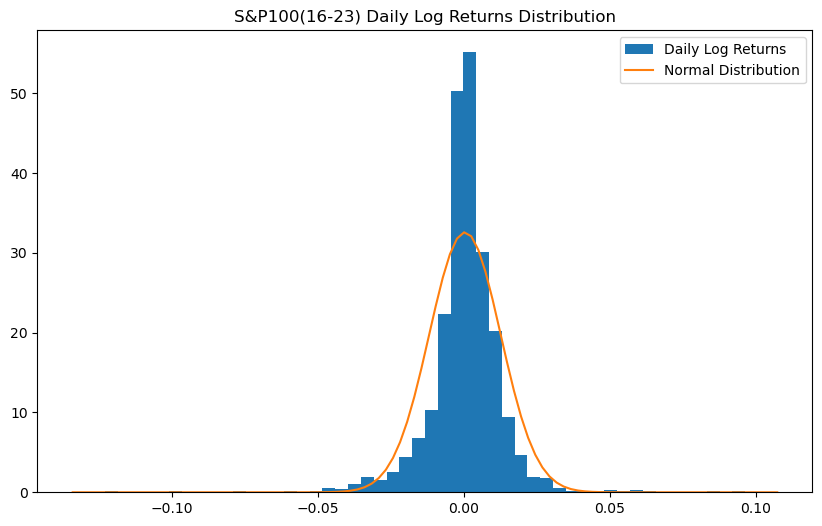

In [10]:
%pip install yfinance
import yfinance as yf
# 2016-2023 (same as exercise 1)
sap100_1 = yf.download('^OEX', start='2016-06-06', end='2023-07-13')
prices_1 = sap100_1['Close']
prices_1.head()

#daily log return
log_return_d = np.log(prices_1/prices_1.shift(1)).dropna() 
log_return_d
plt.figure(figsize=(10, 6))
plt.hist(log_return_d,bins = 50, density=True, label='Daily Log Returns')

# Normality test
jb_d, p_value_d = stats.jarque_bera(log_return_d)
print("Daily JB Statistic:", jb_d)
print("Daily P-Value:", p_value_d)
if p_value_d <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_d, std_d = stats.norm.fit(log_return_d) # stats.norm.fit: return tuple(mean, standard deviation)  
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_d = stats.norm.pdf(x_axis, mean_d, std_d)
plt.plot(x_axis, p_d, label='Normal Distribution')
plt.title('S&P100(16-23) Daily Log Returns Distribution')
plt.legend()
plt.show()

Monthly JB Statistic: 5.719254170565869
Monthly P-Value: 0.05729012061154459
Result: reject H1


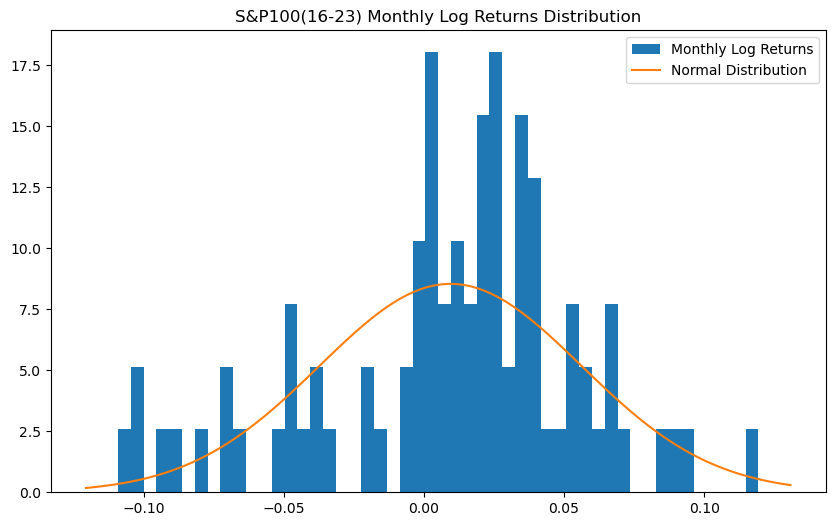

In [11]:
#monthly log return
prices_1_m = prices_1.resample('ME').last()
log_return_m = np.log(prices_1_m/prices_1_m.shift(1)).dropna()
log_return_m
plt.figure(figsize=(10, 6))
plt.hist(log_return_m,bins = 50, density=True, label='Monthly Log Returns')

# Normality test
jb_m, p_value_m = stats.jarque_bera(log_return_m)
print("Monthly JB Statistic:", jb_m)
print("Monthly P-Value:", p_value_m)
if p_value_m <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_m, std_m = stats.norm.fit(log_return_m) # stats.norm.fit: return tuple(mean, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_m = stats.norm.pdf(x_axis, mean_m, std_m)
plt.plot(x_axis, p_m, label='Normal Distribution')
plt.title('S&P100(16-23) Monthly Log Returns Distribution')
plt.legend()
plt.show()

Yearly JB Statistic: 1.4852144180147495
Yearly P-Value: 0.47587160001475715
Result: reject H1


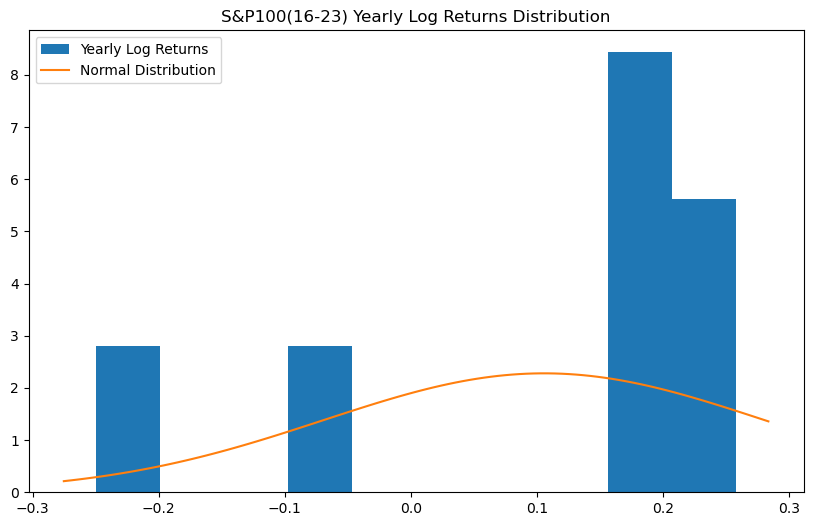

In [12]:
#yearly log return
prices_1_y = prices_1.resample('YE').last()
log_return_y = np.log(prices_1_y/prices_1_y.shift(1)).dropna()
log_return_y
plt.figure(figsize=(10, 6))
plt.hist(log_return_y, density=True, label='Yearly Log Returns')

# Normality test
jb_y, p_value_y = stats.jarque_bera(log_return_y)
print("Yearly JB Statistic:", jb_y)
print("Yearly P-Value:", p_value_y)
if p_value_y <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
YEan_y, std_y = stats.norm.fit(log_return_y) # stats.norm.fit: return tuple(YEan, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_y = stats.norm.pdf(x_axis, YEan_y, std_y)
plt.plot(x_axis, p_y, label='Normal Distribution')
plt.title('S&P100(16-23) Yearly Log Returns Distribution')
plt.legend()
plt.show()

C:\Users\Li-Ji\AppData\Local\Temp\ipykernel_58172\837023617.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sap100_2 = yf.download('^OEX', start='2023-07-16', end='2025-12-05')
[*********************100%***********************]  1 of 1 completed

Daily JB Statistic: 5843.058881867821
Daily P-Value: 0.0
Result: reject H0, in favour of H1


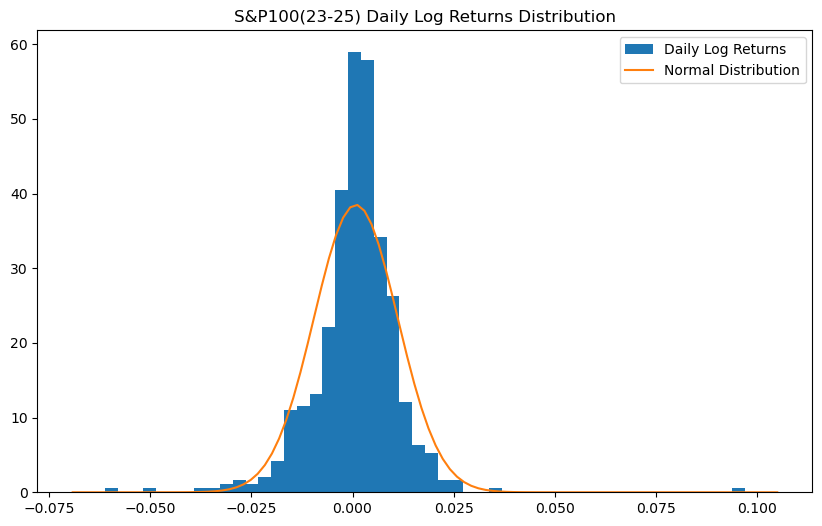

In [13]:
#2023-2025
sap100_2 = yf.download('^OEX', start='2023-07-16', end='2025-12-05')
prices_2 = sap100_2['Close']
prices_2.head()

#daily log return
log_return_d = np.log(prices_2/prices_2.shift(1)).dropna() 
log_return_d
plt.figure(figsize=(10, 6))
plt.hist(log_return_d,bins = 50, density=True, label='Daily Log Returns')

# Normality test
jb_d, p_value_d = stats.jarque_bera(log_return_d)
print("Daily JB Statistic:", jb_d)
print("Daily P-Value:", p_value_d)
if p_value_d <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_d, std_d = stats.norm.fit(log_return_d) # stats.norm.fit: return tuple(mean, standard deviation)  
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_d = stats.norm.pdf(x_axis, mean_d, std_d)
plt.plot(x_axis, p_d, label='Normal Distribution')
plt.title('S&P100(23-25) Daily Log Returns Distribution')
plt.legend()
plt.show()

Monthly JB Statistic: 0.6909747915013669
Monthly P-Value: 0.7078752539838149
Result: reject H1


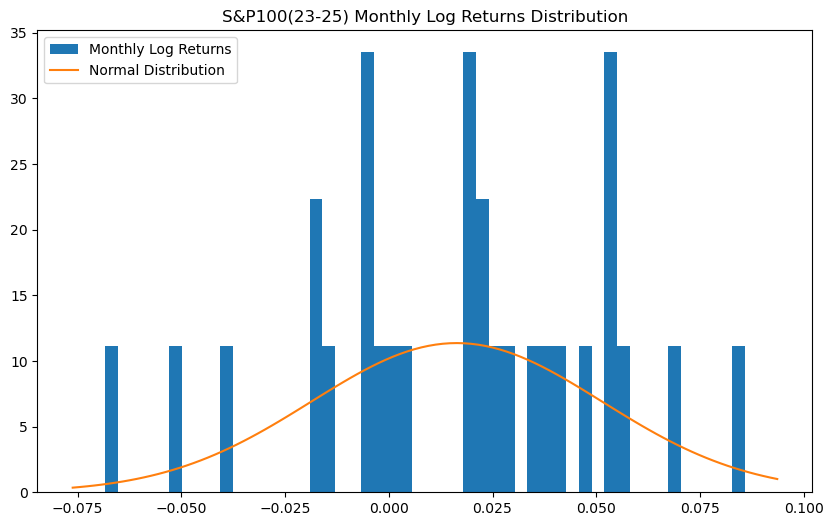

In [14]:
#monthly log return
prices_2_m = prices_2.resample('ME').last()
log_return_m = np.log(prices_2_m/prices_2_m.shift(1)).dropna()
log_return_m
plt.figure(figsize=(10, 6))
plt.hist(log_return_m,bins = 50, density=True, label='Monthly Log Returns')

# Normality test
jb_m, p_value_m = stats.jarque_bera(log_return_m)
print("Monthly JB Statistic:", jb_m)
print("Monthly P-Value:", p_value_m)
if p_value_m <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
mean_m, std_m = stats.norm.fit(log_return_m) # stats.norm.fit: return tuple(mean, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_m = stats.norm.pdf(x_axis, mean_m, std_m)
plt.plot(x_axis, p_m, label='Normal Distribution')
plt.title('S&P100(23-25) Monthly Log Returns Distribution')
plt.legend()
plt.show()

Yearly JB Statistic: 0.3333333333333333
Yearly P-Value: 0.8464817248906141
Result: reject H1


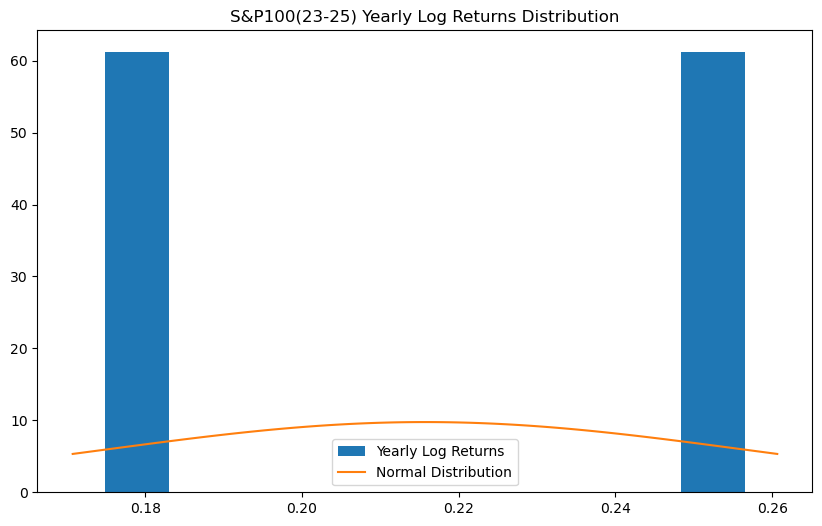

In [15]:
#yearly log return
prices_2_y = prices_2.resample('YE').last()
log_return_y = np.log(prices_2_y/prices_2_y.shift(1)).dropna()
log_return_y
plt.figure(figsize=(10, 6))
plt.hist(log_return_y, density=True, label='Yearly Log Returns')

# Normality test
jb_y, p_value_y = stats.jarque_bera(log_return_y)
print("Yearly JB Statistic:", jb_y)
print("Yearly P-Value:", p_value_y)
if p_value_y <= 0.05:
    print('Result: reject H0, in favour of H1')
else:
    print('Result: reject H1')

# Graphs
YEan_y, std_y = stats.norm.fit(log_return_y) # stats.norm.fit: return tuple(YEan, standard deviation)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p_y = stats.norm.pdf(x_axis, YEan_y, std_y)
plt.plot(x_axis, p_y, label='Normal Distribution')
plt.title('S&P100(23-25) Yearly Log Returns Distribution')
plt.legend()
plt.show()

Final report:

In this exercise, I utilised data from the S&P 100 (OEX) to repeat Exercise 1, dividing the analysis into two distinct time periods. For the first period (2016–2023), I adhered to the same timescale as Exercise 1. The results obtained are consistent with the previous exercise, indicating that the aggregate index exhibits a tendency similar to that of individual component stocks.

Furthermore, I extended the analysis to the 2023–2025 period to evaluate whether the findings have shifted over the last two years. The results remain robust, confirming that stock returns continue to exhibit aggregational Gaussianity.

Exercise 4

Estimate the α and β of each stock according to the single-index model using ordinary least squares regression over monthly excess returns, storing your results in a DataFrame. Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.

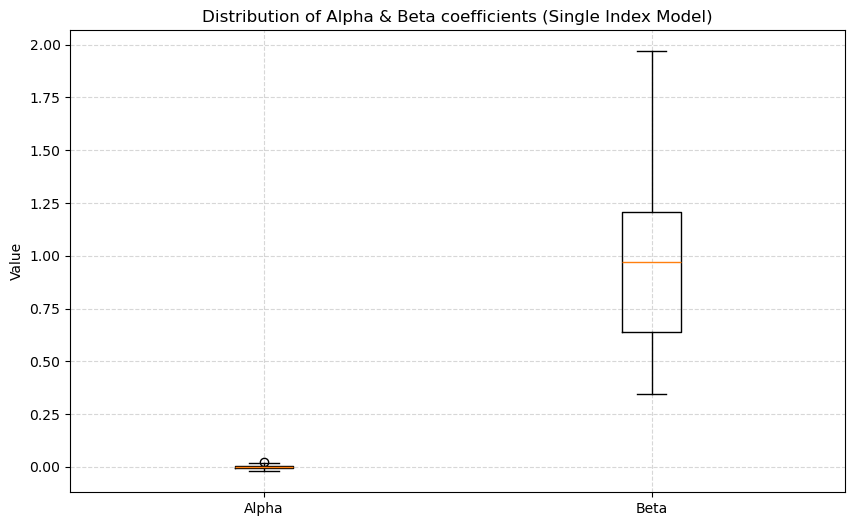

In [16]:
rm_m = np.log(prices_1_m/prices_1_m.shift(1)).dropna()
r_m = np.log(prices.resample('ME').last() / prices.resample('ME').last().shift(1)).replace([np.inf, -np.inf], np.nan)
rf_m = 0

combined = pd.merge( r_m, rm_m, on='Date', how='left')
combined.head()

sap100 = '^OEX'
sim_results = []
for col in combined.columns:
    if col == sap100:
        continue
    temp_df = combined[[col, sap100]].dropna()
    if len(temp_df) < 10:
        continue
    Y_excess = temp_df[col] - rf_m
    X_excess = temp_df[sap100] - rf_m
    slope, intercept, r_value, p_value, std_error = stats.linregress(X_excess, Y_excess)
    sim_results.append({'Stock': col,'Alpha': intercept,'Beta': slope})
sim_results
type(sim_results)
sim = pd.DataFrame(sim_results)
sim.head()

plt.figure(figsize=(10, 6))
plot = [sim['Alpha'], sim['Beta']]
plt.boxplot(plot, tick_labels=['Alpha', 'Beta'])
plt.title('Distribution of Alpha & Beta coefficients (Single Index Model)')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

$R_s - R_m = alpha + beta(R_m - R_f) + epsilon$

Exercise 5

Compute the covariance matrix of the components of the index using the monthly excess-returns. According to the single-index model (see Elton and Gruber 1997; reference below), the covariance of a given pair of stocks should be directly proportional to the product of the corresponding β values. Test this hypothesis, and summarise your results in a single graph. Provide a written explanation of your results, and a short critical discussion.

D:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


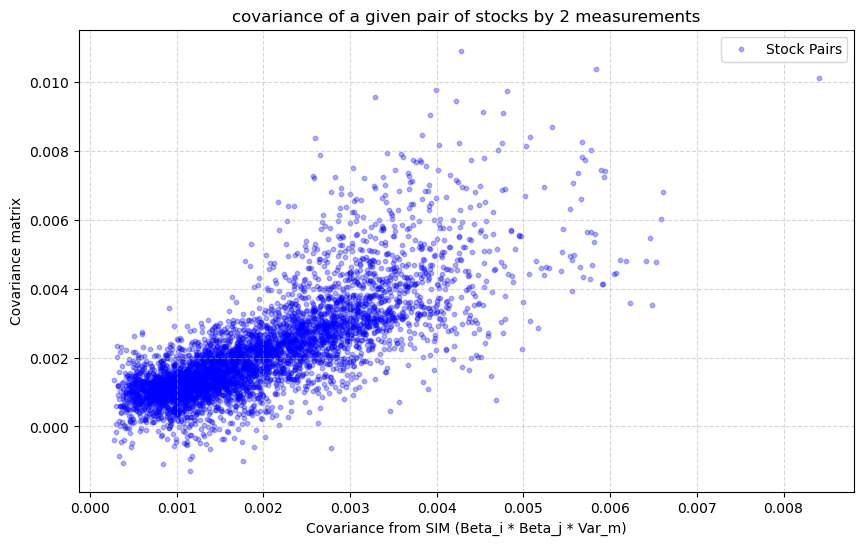

In [110]:
r_m = np.log(prices.resample('ME').last() / prices.resample('ME').last().shift(1)).replace([np.inf, -np.inf], np.nan)
type(r_m)
rm_m = np.log(prices_1_m/prices_1_m.shift(1)).dropna()
rf_m = 0
ex_r_m= r_m - rf_m
cov_1 = ex_r_m.cov()
cov_1
ex_rm_m= rm_m - rf_m
varm_m = ex_rm_m.var()
varm_m
beta = dict(zip(sim['Stock'], sim['Beta']))
beta
stocks = list(sim['Stock'])
stocks_num = len(stocks)

Cov_sim = []
Cov_matrix = []

for i in range(stocks_num):
    for j in range(i + 1, stocks_num):
        stock_i = stocks[i]
        stock_j = stocks[j]
        if stock_i in cov_1.columns and stock_j in cov_1.columns:
            if stock_i in beta and stock_j in beta:
                beta_i = beta[stock_i]
                beta_j = beta[stock_j]
                cov_sim = beta_i * beta_j * varm_m
                cov_matrix = cov_1.loc[stock_i, stock_j]
                Cov_sim.append(cov_sim)
                Cov_matrix.append(cov_matrix)

plt.figure(figsize=(10,6))
plt.scatter(Cov_sim, Cov_matrix, alpha=0.3, s=10, color='blue', label='Stock Pairs')
plt.title('Covariance of a given pair of stocks by 2 measurements')
plt.xlabel('Covariance from SIM (Beta_i * Beta_j * Var_m)')
plt.ylabel('Covariance matrix')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

I utilised the Single Index Model (SIM) formula, $\text{Cov}(i,j) = \beta_i \beta_j \sigma^2_m$ (Elton & Gruber, 1997), to derive theoretical covariance values and compared them against sample covariance. As illustrated in the graph, there is a distinct positive correlation between the theoretical and empirical values. This is particularly evident where values cluster below 0.004, indicating a high degree of predictive accuracy. These results suggest that the model successfully captures the primary systematic risk of the market. However, noticeable dispersion persists, attributable to the model's strict assumption that the residuals of any two stocks are uncorrelated. In reality, significant cross-correlations often exist due to industry or sector factors. In conclusion, while the SIM is a potent tool for reducing computational complexity, its assumption of uncorrelated residuals represents a significant limitation.

References

Cont, R. (2001). Empirical properties of asset returns: stylized facts and statistical issues. Quantitative Finance, 1(2), 223–236. https://doi.org/10.1080/713665670

Elton, E. J., & Gruber, M. J. (1997). Modern portfolio theory, 1950 to date. Journal of Banking and Finance, 21(11–12), 1743–1759. https://doi.org/10.1016/S0378-4266(97)00048-4